# 3. Logistic regression

In [1]:
%matplotlib inline
import warnings;warnings.filterwarnings('ignore');import matplotlib.pyplot as plt;import numpy as np;import pandas as pd;import seaborn as sns;sns.set_context("notebook", font_scale=1.4);sns.set_style("whitegrid");import imp;compomics_import = imp.load_source('compomics_import', '../compomics_import.py');from IPython.core.display import HTML;css_file = '../my.css';HTML(open(css_file, "r").read())

**Logistic regression** (or **logit regression**) is an example of a regression model where the target is **categorical**, i.e. a **label** just as in Peter's task. The logistic regression algorithm can be applied successfully to **linearly separable two class** data sets. Logistic regression is a popular algorithm in bioinformatics as it can learn accurate predictive models for large data set very fast. 

As we will see logistic regression models predict **class probabilities** rather than classes. These probabilities provide an important estimation of the confidence the model has in the prediction. Let's open a data set.

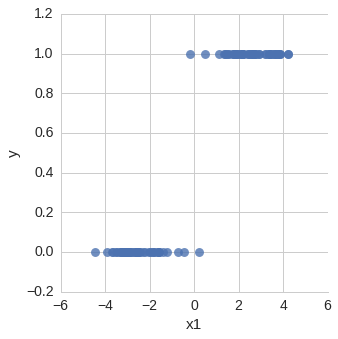

In [2]:
dataset = pd.read_csv("logistic.csv")

sns.lmplot(x="x1", y="y", data=dataset, fit_reg=False, size=5, scatter_kws={"s": 80})
plt.show()

How does classification differ from regression? After all we could just try to fit a linear model

$$\theta^{\prime} x=\theta_0x_0 + \theta_1x_1$$

to the data. This would compute a linear function $f(x,\theta)$ that shows the linear relation between $x_1$ and $y$.
We could then apply a **threshold** to map the output of $f(x,\theta)$ onto class 0 or 1. For instance $y=1$ if $f(x) \geq 0.5$ and $y=0$ otherwise:

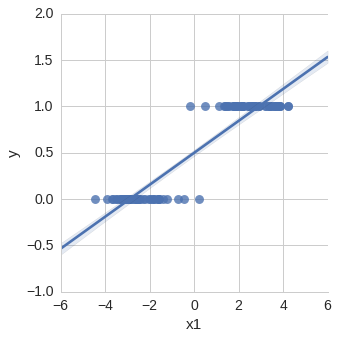

In [3]:
from sklearn import metrics

sns.lmplot(x="x1", y="y", data=dataset, fit_reg=True, size=5, scatter_kws={"s": 80})
plt.show()

This linear fit achieves $R^2=0.88$, which would seem good. Although judging from the plot we have to admit it doesn't look right. We can obtain a much better fit by using the **logistic function** $g(z)$ as a model for our data. This model is formalized as

$$ f(x,\theta)=g(\theta^{\prime} x),$$

with

$$g(z)=\frac{1}{1+e^{-z}}.$$

The following plot shows how $f(x,\theta)$ non-linearly transforms $\theta^{\prime} x$ into a value between zero and one, the class probabilities:

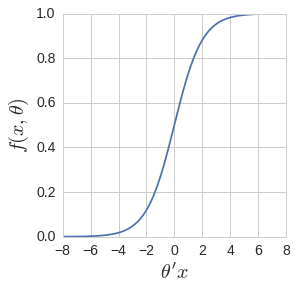

In [4]:
plt.figure(figsize=(4,4))
compomics_import.plot_logistic([2, -0.5])
plt.show()

Since we assume the data to be linearly separable instead to linearly related we have to also adapt the cost function $J(\theta)$ accordingly. The cost for the logistic regression learning algorithm is 

$$J(\theta)=-[\frac{1}{n}\sum\limits_{i=1}^ny^{(i)}log(f(x^{(i)},\theta))+(1-y^{(i)})log(1- f(x^{(i)},\theta))].$$

We know that $y^{(i)}$ is either 0 or 1. If $y^{(i)}=1$ then the cost function $J(\theta)$ is incremented by

$$-log(f(x^{(i)},\theta)).$$

Similarly, if $y^{(i)}=0$ then the cost function $J(\theta)$ is incremented by

$$-log(1- f(x^{(i)},\theta)).$$

To understand this we can plot these increments as a function of $\theta^{\prime} x$:

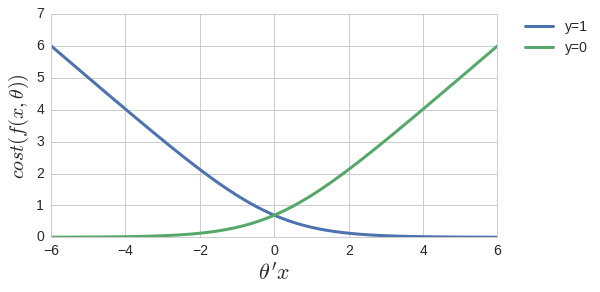

In [5]:
compomics_import.plot_lr_cost()
plt.show()

The blue curve shows the increment to the cost function for $y=1$. In this case if $\theta^{\prime} x$ is large then the increment should be small. If instead $\theta^{\prime} x$ is small then the increment should be large. We can see that the increment shown in the blue curve does indeed satisfy these criteria. The green curve shows the increment for $y=0$. In this case if $\theta^{\prime} x$ is small then the increment should be small. If instead $\theta^{\prime} x$ is large then the increment should be large. 

We can use the gradient descent optimization algorithm to find the optimal values for $\theta$ given a train set. Similarly to linear regression the increments or decrements in each iteration are computed as:

$$\theta_0:=\theta_0-\alpha\frac{1}{n}\sum\limits_{i=1}^n(f(x^{(i)},\theta)-y^{(i)})x_0^{(i)},$$

$$\theta_1:=\theta_1-\alpha\frac{1}{n}\sum\limits_{i=1}^n(f(x^{(i)},\theta)-y^{(i)})x_1^{(i)},$$

with $\alpha$ again the learning rate that controls the convergence of the gradient descent iterations. In scikit-learn we can use the module `LogisticRegression` to compute the optimal logistic function for our data to obtain a much better fit of the data:

In [6]:
from sklearn.linear_model import LogisticRegression
 
model = LogisticRegression(C=10000)
model.fit(dataset['x1'][:, np.newaxis],dataset['y'])

print "R-squared = %f" % metrics.r2_score(dataset['y'],model.predict_proba(dataset['x1'][:, np.newaxis])[:,1])

R-squared = 0.961327


Now  $R^2=0.96$. When we plot this logistic function we can see why the fit is much better. In fact, the function value $y$ of the logistic fit will always be a value between 0 and 1 and estimates the probability of a data point belonging to class 1. Again we can apply a threshold to map the output of $f(x)$ onto a class.

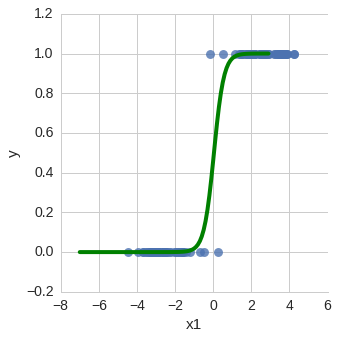

In [7]:
def logistic(theta0,theta1,x):
    return 1/(1+(np.exp(-1*(theta0+(x*theta1)))))

sns.lmplot(x="x1", y="y", data=dataset, fit_reg=False, size=5, scatter_kws={"s": 80})
plt.plot(np.arange(-7,3,0.1),logistic(model.intercept_,model.coef_[0],np.arange(-7,3,0.1)),lw=4,color='green')
plt.show()

When we have $m$ dependent variables in our data set the cost function for logistic regression becomes

$$f(x,\theta)=g(\theta_0x_0 + \theta_1x_1 + \theta_2x_2+...+\theta_mx_m) = g(\theta^{\prime} x),$$

and the updates during gradient descent are computed as

$$\theta_j:=\theta_j-\alpha\frac{1}{n}\sum\limits_{i=1}^n(f(x^{(i)},\theta)-y^{(i)})x_j^{(i)}.$$

Let's take a look at an example for $m=2$. We load a data set with two features and apply logistic regression to compute a probabilistic decision boundary:

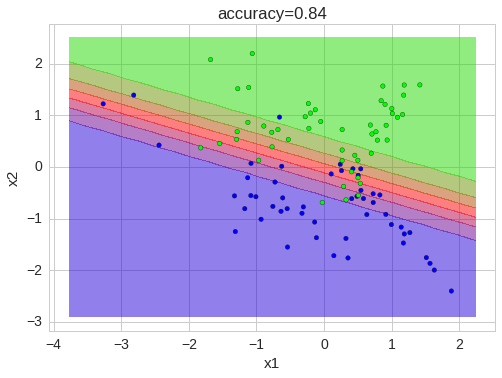

In [8]:
import sklearn.datasets as ds
from sklearn.preprocessing import StandardScaler

dataset2D = pd.read_csv("dataset2D.csv")

X = dataset2D.copy()
y = X.pop('y')

model = LogisticRegression(C=100000)
model.fit(X,y)
score = model.score(X, y)

plt.title("accuracy = %.2f" % score)
compomics_import.plot_decision_boundary(model,X,y)
plt.show()

The green data points were labeled 0 and the blue points as 1. The color gradient runs from green (0) to red to blue (1) and represents the fitted model. We can now see more clearly how logistic regression **generalizes** the training points into two classes indicated by the green and the blue spaces. The model thus allows us to predict the class of future samples. In scikit-learn the module `LogisticRegression` contains a method `predict_proba()` that predicts the probabilities for the classes in a data set given a trained model:

In [9]:
predictions = model.predict_proba(X)
print predictions[:10]

[[ 0.00553644  0.99446356]
 [ 0.99133532  0.00866468]
 [ 0.67601956  0.32398044]
 [ 0.03953503  0.96046497]
 [ 0.91253213  0.08746787]
 [ 0.55021616  0.44978384]
 [ 0.65698596  0.34301404]
 [ 0.0067126   0.9932874 ]
 [ 0.06459638  0.93540362]
 [ 0.02769494  0.97230506]]


**Multiclass** or **multinomial** classification is the problem of classifying instances into one of the more than two classes. Logistic regression computes **binary** classification models that can only separate two classes. Most machine learning classification learning algorithms compute binary classification models, but there exist also learning algorithms that can compute multiclass models.

Many methods exist to combine binary classification models to produce a multiclass model. Here we will describe two popular ones: **one-against-all** and **one-against-one**.

Suppose we have a data set with $H$ classes. The one-against-all (or one-against-rest) method involves training a single classification model for each class $h_i$, with the samples for $h_i$ as positive samples and all other samples as negative samples. This method requires the binary classification model to compute a real-valued confidence score for its decision, rather than just a class label. Discrete class labels alone can lead to ambiguities, where multiple classes are predicted for a single sample. When a test point is presented each classification model is applied and the class $h_i$ associated with the model that computes the highest confidence is the predicted class for the test point. 

The one-against-one method involves training

$$\frac{H(H-1)}{2}$$

binary classification models where each model us trained on the samples of a pair of classes from the original training set, and must learn to distinguish these two classes. When a test point is presented each classification model is applied and the class that got the highest number of positive predictions gets predicted by the combined classifier.



<strong>Exercises</strong>

- The Breast Cancer Wisconsin database is an (old) well known data set in which each data point represents a digitized image of a fine needle aspirate (FNA) of a breast mass labeled as benign (class 0) or malignant (class 1). The 10 features describe characteristics of the cell nuclei present in the image. Load the data set ('../breast-cancer-wisconsin.data') and split the data set into 3 folds. Leave out fold 2 and train a logistic regression model on the remaining data points, then test the performance of this model (measured as AUC) on fold 2.

- Now do the same but first standardize the features.